<a href="https://colab.research.google.com/github/pizzapuppies/Youssif_FYP_Code/blob/main/data_comparer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import math
import os
import numpy as np
from google.colab import drive
import sys
drive.mount('/content/gdrive')
sys.setrecursionlimit(300000)

Mounted at /content/gdrive


#data extraction

In [ ]:
#@title extract and label real data 
real_data = {}
with open("/content/gdrive/My Drive/data.csv","r") as rfile:
  reader  = csv.reader(rfile)
  for row in reader:
   label = row[0] if "n" not in row[0] else "n"
   if label not in real_data.keys():
    real_data[label] = []   
   real,imag = list(map(float,row[1:51])),list(map(float,row[51:]))
   temp  = []
   for j in range(len(imag)):
     temp.append([real[j],imag[j]])
   real_data[label].append(temp)
print("The data is in the form: ",np.array(real_data["p0.5"][0]).shape)

The data is in the form:  (50, 2)


In [ ]:
#@title extract and label GAN data 
s_data_path = "/content/gdrive/My Drive/gan_data"
SD = os.listdir(s_data_path) # Synthetic Data

g_data = {}
temp = []
for fi in SD:
  cl = fi.split("_")[1]
  g_data[cl] = []
  with open(s_data_path+"/"+fi,"r") as rfile:
    
    reader = csv.reader(rfile)
    for row in reader:
      real,imag = list(map(float,row[1:51])),list(map(float,row[51:]))
      temp  = []
      for j in range(len(imag)):
        temp.append([real[j],imag[j]])
      g_data[cl].append(temp)        

print("The data is in the form: ",np.array(g_data["p0.5"][0]).shape)

The data is in the form:  (50, 2)


In [ ]:
#@title extract and label VAE data 
v_data = {}
with open("/content/gdrive/My Drive/labeled_vae_data.csv",'r') as rfile:
  reader = csv.reader(rfile)
  for row in reader:
   label = row[0] if "n" not in row[0] else "n"
   if label not in v_data.keys():
    v_data[label] = []
   
   real,imag = list(map(float,row[1:51])),list(map(float,row[51:]))
   temp  = []
   for j in range(len(imag)):
     temp.append([real[j],imag[j]])
   v_data[label].append(temp)
print("The available keys are: ", list(v_data.keys()))
print("The data is in the form: ",np.array(g_data["p32"][0]).shape)

The available keys are:  ['p32', 'p16', 'p2', 'p8', 'p1']
The data is in the form:  (50, 2)


#Distance caluclation function

In [ ]:
#@title L2 distance calculator

def cal_distance(g1,g2):  
  dist = 0
  for i in range(len(g1)):
    dist += ((g1[i][0]-g2[i][0])**2 + (g1[i][1]-g2[i][1])**2)**0.5
  return int(dist)

# testing the function
cal_distance(real_data['p0.5'][0],real_data['p0.5'][1])

3579

#Calculating and ploting the distance

In [ ]:
#@title the distance of the real data 

real_dist = {}
for i in real_data.keys():
  real_dist[i] = []

for key in real_data.keys():
  for cur in real_data[key]:
    temp = 0
    for real in real_data[key]:
      temp += cal_distance(cur,real)

    real_dist[key].append(temp+temp//len(real_data[key]))
    


In [ ]:
#@title the distance of the GAN data 
gan_rec = {}
gan_dist = {}
for i in g_data.keys():
  gan_dist[i] = []
  gan_rec[i] = []

for key in g_data.keys():
  for cur in g_data[key]:
    for real in real_data[key]:
      temp += cal_distance(cur,real)
    gan_rec[key].append([temp,cur]) 
    gan_dist[key].append(temp)



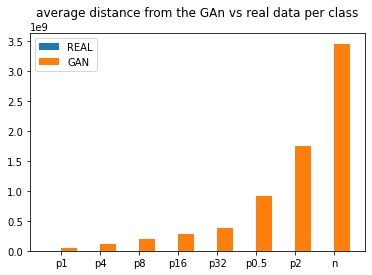

In [ ]:
#@title plot of the GAN data distance when compared to real data
real = {}
gan = {}
for key in gan_dist.keys():

  real[key] = sum(real_dist[key]) // len(real_dist[key])
  gan[key] = sum(gan_dist[key])//len(gan_dist[key])



import matplotlib.pyplot as plt

x_axis = np.arange(len(gan.keys()))

# Multi bar Chart

plt.bar(x_axis -0.2, real.values(), width=0.4, label = 'REAL')
plt.bar(x_axis +0.2, gan.values(), width=0.4, label = 'GAN')

# Xticks

plt.xticks(x_axis, list(gan.keys()))

# Add legend

plt.legend()
plt.title("average distance from the GAn vs real data per class")
plt.show()








real data disatnce is about 10,000 smaller to the point that it does not register

In [ ]:
#@title the distance of the VAE data 
vae_rec = {}
vae_dist = {}
for i in v_data.keys():
  vae_dist[i] = []
  vae_rec[i] = []

for key in v_data.keys():
  for cur in v_data[key]:
    for real in real_data[key]:
      temp += cal_distance(cur,real)
    vae_rec[key].append([temp,cur]) 
    vae_dist[key].append(temp)



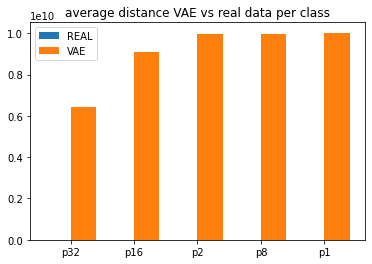

In [ ]:
#@title plot of the VAE data distance when compared to real data
real = {}
vae = {}
for key in vae_dist.keys():

  real[key] = sum(real_dist[key]) // len(real_dist[key])
  vae[key] = sum(vae_dist[key])//len(vae_dist[key])



import matplotlib.pyplot as plt

x_axis = np.arange(len(vae.keys()))

# Multi bar Chart

plt.bar(x_axis -0.2, real.values(), width=0.4, label = 'REAL')
plt.bar(x_axis +0.2, vae.values(), width=0.4, label = 'VAE')



plt.xticks(x_axis, list(vae.keys()))

# Add legend

plt.legend()
plt.title("average distance VAE vs real data per class")
plt.show()


#Sorting and keeping the best 100 examples of each class

In [ ]:
#@title quick sort function to sort the lists (sort_rec)
def sort_rec(rec): # record is a list with [ [rank,data-points(shape: 50,2)] ,...]
  if rec == []: 
          return []
  else:
      pivot = rec[0]
      lesser = sort_rec([x for x in rec[1:] if x[0] < pivot[0]])
      greater = sort_rec([x for x in rec[1:] if x[0] >= pivot[0]])
      return lesser + [pivot] + greater



In [ ]:
#@title sorting the gan and vae data


for key in gan_rec.keys():
  x = sort_rec(gan_rec[key])
  if len(x) > 100: gan_rec[key] = x[:100]
  else: gan_rec[key] = x

for key in vae_rec.keys():
  x = sort_rec(vae_rec[key])
  if len(x) > 100: vae_rec[key] = x[:100]
  else: vae_rec[key] = x

In [ ]:
#@title writing top 100 GAN & VAE to a file 

with open("/content/gdrive/My Drive/vae100_data.csv",'w') as wfile:
  writer = csv.writer(wfile)
  for key in vae_rec.keys():
    for row in vae_rec[key]:
      real = []
      imag = []
      for i in row[1]:
        real.append(i[0])
        imag.append(i[1])
      writer.writerow([key] +real+imag )

with open("/content/gdrive/My Drive/gan100_data.csv",'w') as wfile:
  writer = csv.writer(wfile)
  for key in gan_rec.keys():
    for row in gan_rec[key]:
      real = []
      imag = []
      for i in row[1]:
        real.append(i[0])
        imag.append(i[1])
      writer.writerow([key] +real+imag )

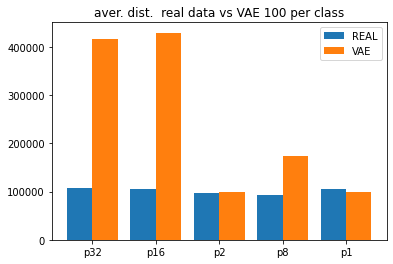

In [ ]:
#@title the new plot of the top 100 VAE when compared to real data 

vae_dist = {}
for i in vae_rec.keys():
  vae_dist[i] = []
  

for key in vae_rec.keys():
  for cur in vae_rec[key]:
    temp = 0
    for real in real_data[key]:
      temp += cal_distance(cur[1],real)
    vae_dist[key].append(temp)
real = {}
vae = {}
for key in vae_dist.keys():

  real[key] = sum(real_dist[key]) // len(real_dist[key])
  vae[key] = sum(vae_dist[key])//len(vae_dist[key])



import matplotlib.pyplot as plt

x_axis = np.arange(len(vae.keys()))

# Multi bar Chart

plt.bar(x_axis -0.2, real.values(), width=0.4, label = 'REAL')
plt.bar(x_axis +0.2, vae.values(), width=0.4, label = 'VAE')



plt.xticks(x_axis, list(vae.keys()))

# Add legend

plt.legend()
plt.title("aver. dist.  real data vs VAE 100 per class")
plt.show()


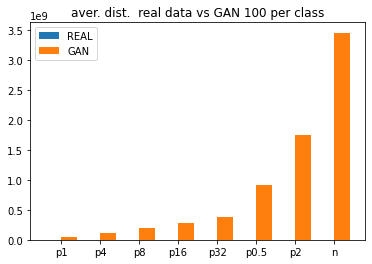

In [ ]:
#@title the new plot of the top 100 GAN when compared to real data 

gan_dist = {}
for i in gan_rec.keys():
  gan_dist[i] = []
  

for key in gan_rec.keys():
  for cur in gan_rec[key]:
    temp = 0
    for real in real_data[key]:
      temp += cal_distance(cur[1],real)
    gan_dist[key].append(temp)
real = {}
vae = {}
for key in gan_dist.keys():

  real[key] = sum(real_dist[key]) // len(real_dist[key])
  vae[key] = sum(gan_dist[key])//len(gan_dist[key])



import matplotlib.pyplot as plt

x_axis = np.arange(len(gan.keys()))

# Multi bar Chart

plt.bar(x_axis -0.2, real.values(), width=0.4, label = 'REAL')
plt.bar(x_axis +0.2, gan.values(), width=0.4, label = 'GAN')



plt.xticks(x_axis, list(gan.keys()))

# Add legend

plt.legend()
plt.title("aver. dist.  real data vs GAN 100 per class")
plt.show()